In [7]:
import pandas as pd

# import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
# warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [3]:
def load_old_feat():
    spammer_order = "../data/spammer_order.csv"
    feat_list = ['post_num', 'follower_num', 'followee_num', 'content_similar',
     'figure_jing', 'figure_url', 'figure_face', 'figure_RRT', 'figure_face_every',
     'figure_jing_every', 'figure_url_every', 'figure_url_single', 'figure_jing_single',
     'figure_at', 'figure_at_every', 'figure_at_single', 'average_repost', 'average_comm',
     'late_night_times', 'is_regular', 'shorttime_times', 'active_day_ratio', 'day_interval_variance',
     'day_in_variance', 'follow_ratio']

    raw_file = pd.read_csv(spammer_order)
    data = raw_file[feat_list]
    target = raw_file[['is_spammer']]
    return data, target

In [1]:
import load_new_feat as ld
# load previous data
# data, target = load_old_feat()
# load new crawlered data
data, target = ld.load_feat()
data['is_spammer'] = target
data

,hashtag,reputation,post_num,mention,test_similarity,url,time_interval_mean,time_interval_var,followers_num,following_num,content_length,is_spammer
0,15,0.500000,1005,7,0.034592,1,30972.857143,8.239935e+08,179,358,60.480000,no
1,10,1.733333,1819,3,0.026582,0,33023.000000,7.491242e+08,312,180,48.510204,no
2,18,0.984615,3542,3,0.027306,2,36453.708333,6.229223e+08,704,715,59.979592,no
3,27,0.012920,340,19,0.031989,4,11511.346939,7.102748e+08,5,387,102.660000,no
4,7,0.204396,371,3,0.055030,38,26378.770833,7.995144e+08,93,455,54.918367,yes
5,0,0.136757,467,1,0.030800,0,37345.510204,1.169251e+08,253,1850,50.800000,yes
6,6,0.491667,620,2,0.051178,2,18005.395349,1.072603e+09,59,120,73.931818,no
7,4,0.302083,401,42,0.415591,4,14511.469388,6.036607e+08,116,384,59.680000,yes
8,4,0.498062,631,1,0.029096,3,20287.081633,8.519779e+08,257,516,61.840000,no
9,12,3.493370,1479,4,0.074021,18,33078.620000,1.000798e+09,6323,1810,69.666667,yes


In [2]:
data['is_spammer'] = data['is_spammer'].map(dict(yes=1, no=0))
data['is_spammer'].value_counts()

0    793
1    773
Name: is_spammer, dtype: int64

In [3]:
data.head()

,hashtag,reputation,post_num,mention,test_similarity,url,time_interval_mean,time_interval_var,followers_num,following_num,content_length,is_spammer
0,15,0.500000,1005,7,0.034592,1,30972.857143,8.239935e+08,179,358,60.480000,0
1,10,1.733333,1819,3,0.026582,0,33023.000000,7.491242e+08,312,180,48.510204,0
2,18,0.984615,3542,3,0.027306,2,36453.708333,6.229223e+08,704,715,59.979592,0
3,27,0.012920,340,19,0.031989,4,11511.346939,7.102748e+08,5,387,102.660000,0
4,7,0.204396,371,3,0.055030,38,26378.770833,7.995144e+08,93,455,54.918367,1


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

/home/lzc/Common/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


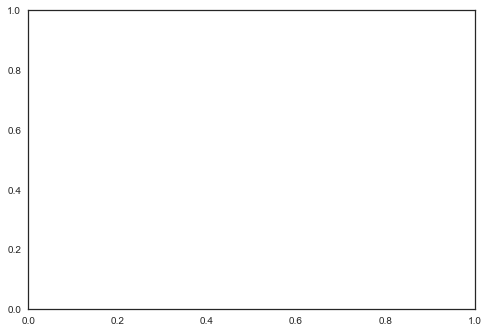

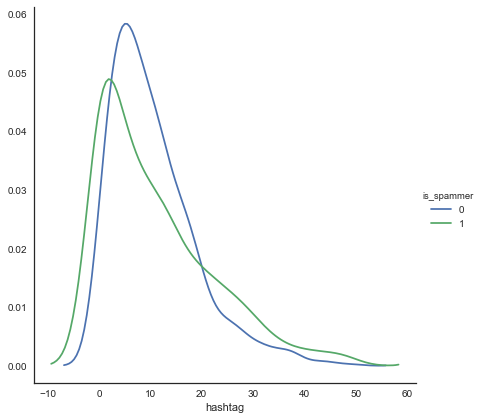

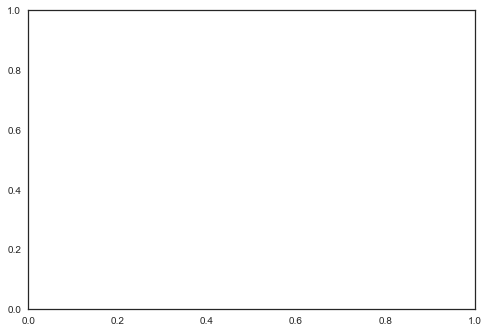

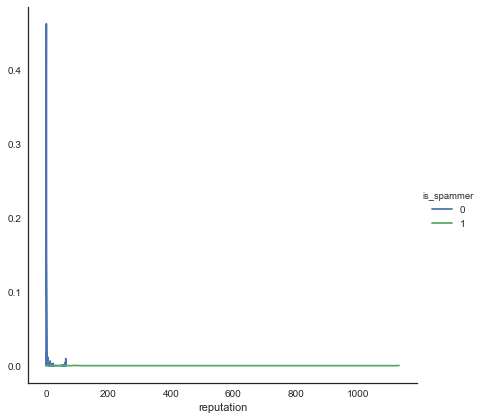

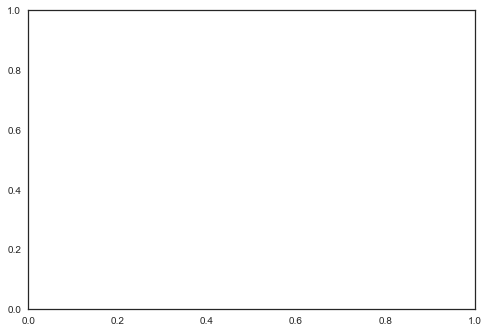

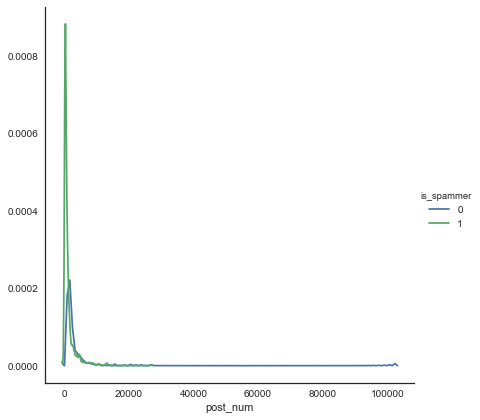

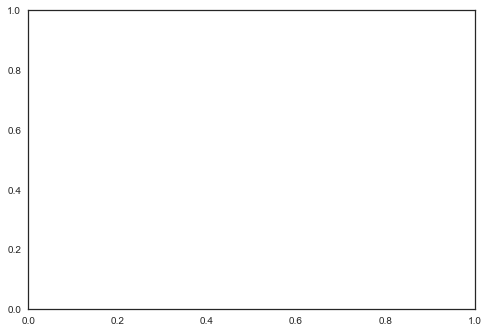

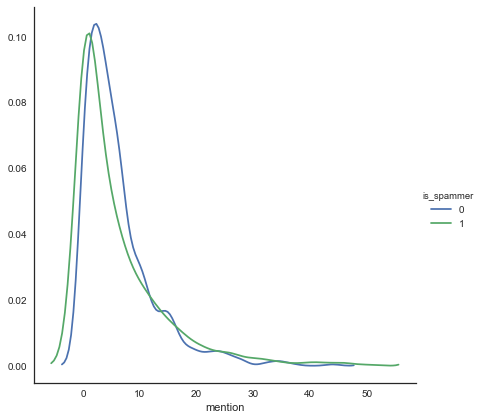

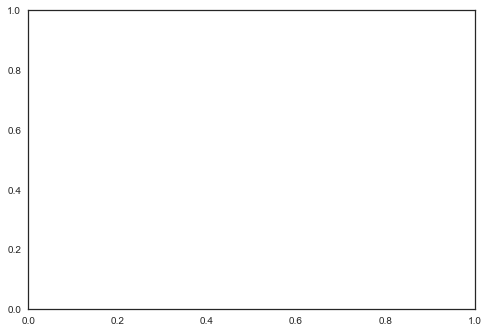

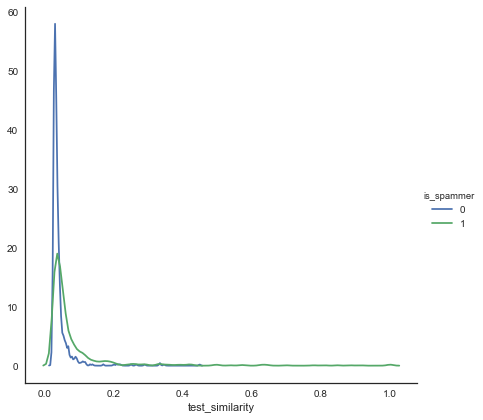

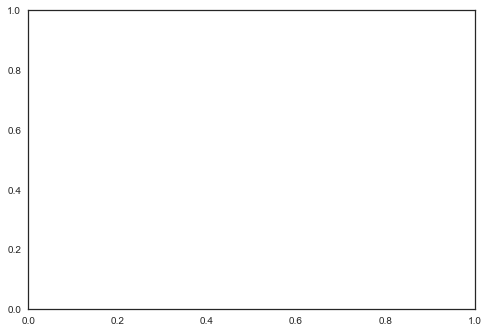

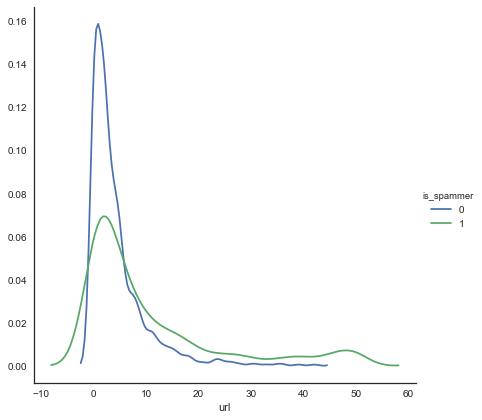

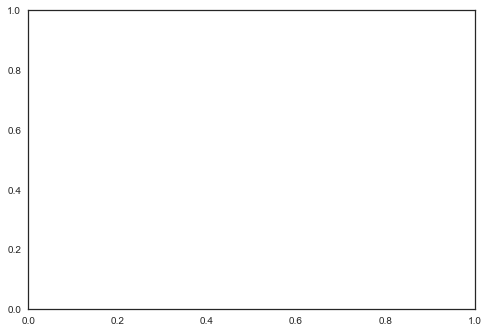

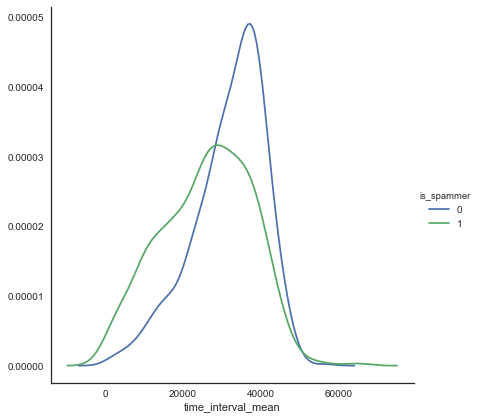

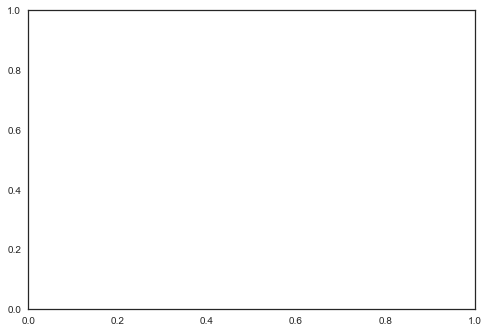

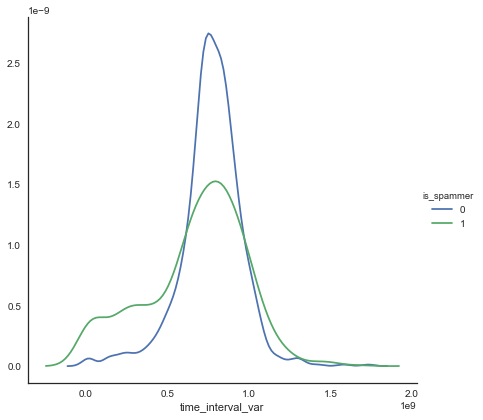

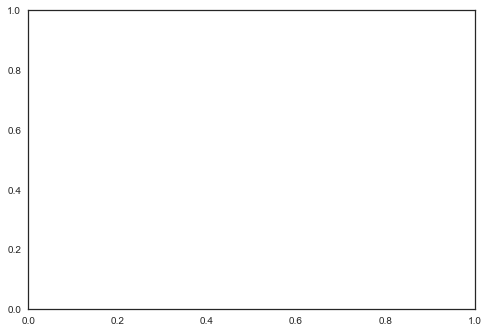

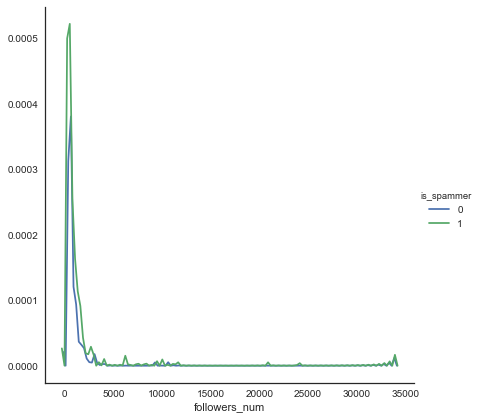

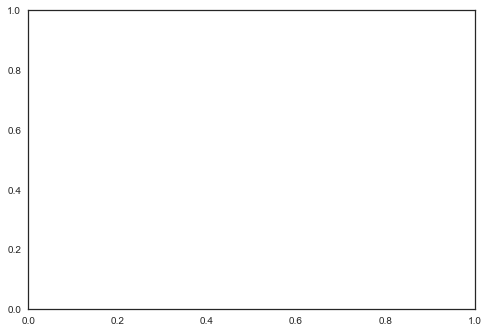

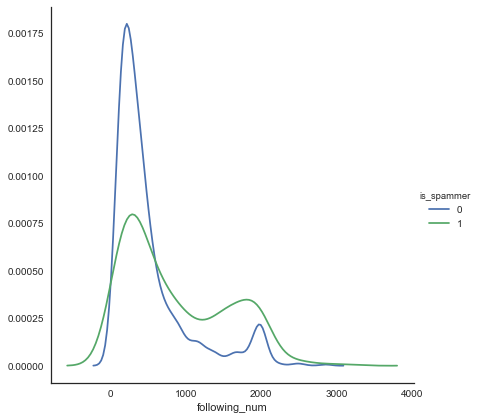

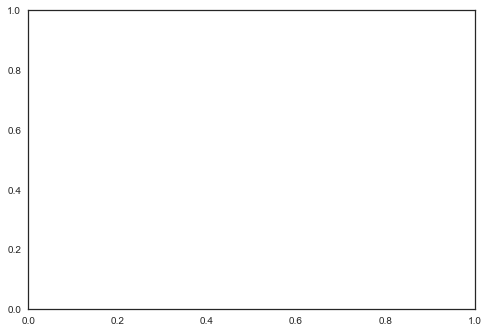

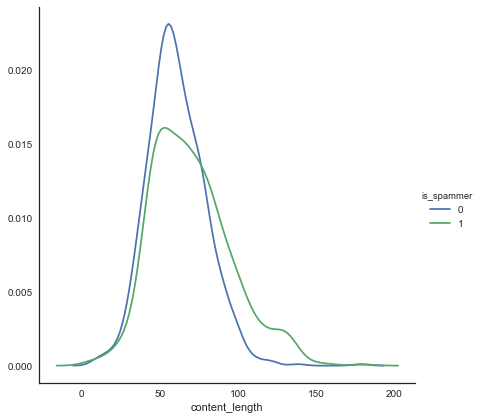

In [8]:
from IPython.display import display
for column_name in data.columns:
    if column_name != "is_spammer":
        # box plot
        # sns.boxplot(x="is_spammer", y="time_interval_var", data=data)
        fig, axes = plt.subplots()
#         dis = sns.violinplot(x="is_spammer", y=column_name, data=data, size=6)     
        sns.FacetGrid(data, hue="is_spammer", size=6).map(sns.kdeplot, column_name).add_legend()

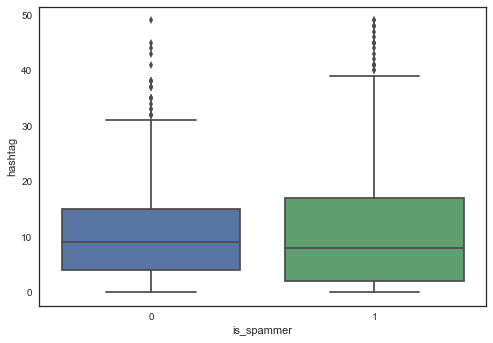

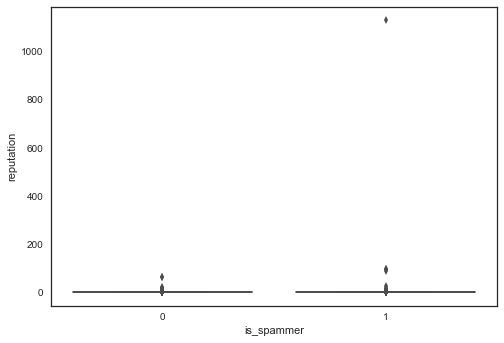

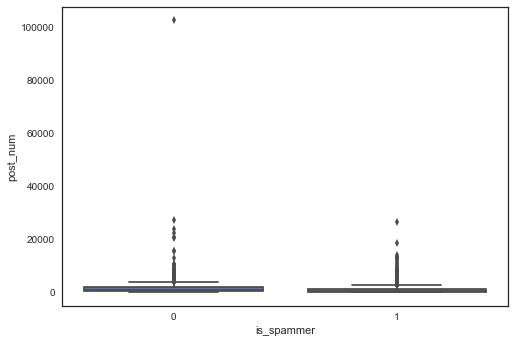

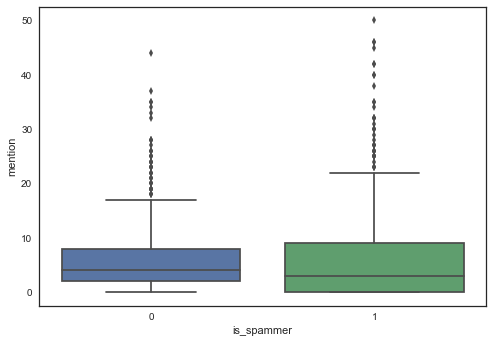

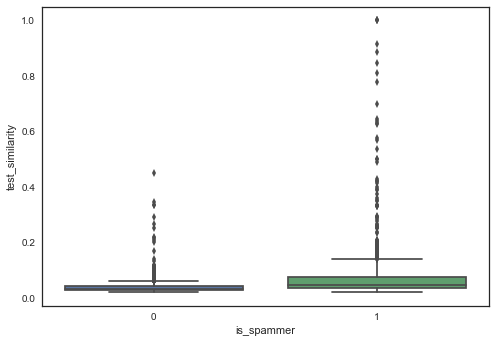

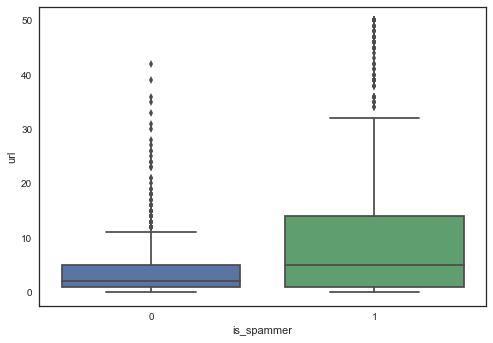

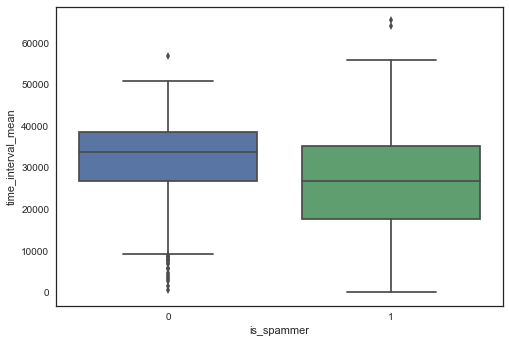

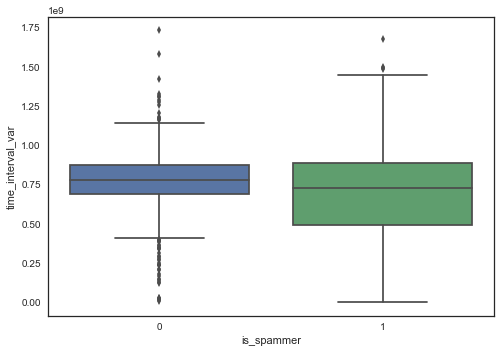

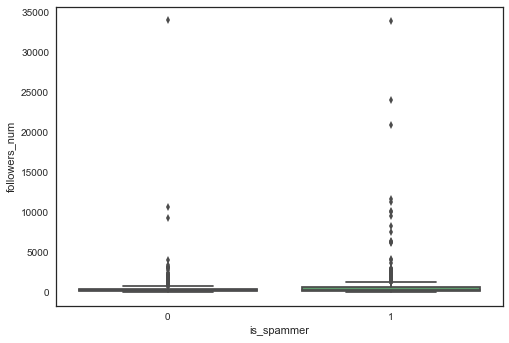

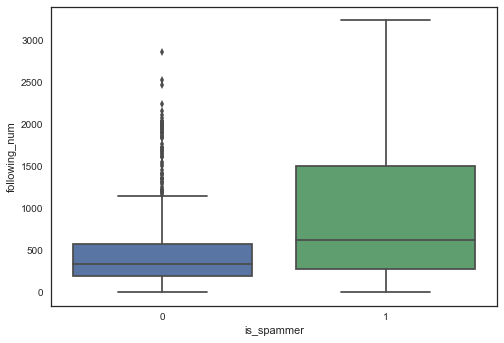

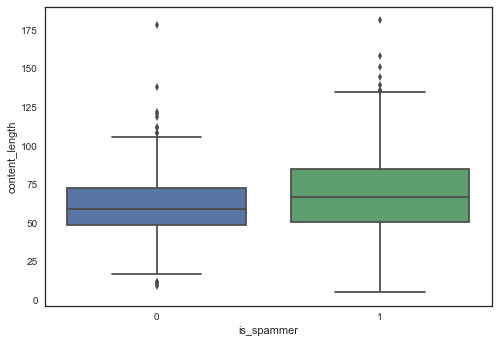

In [9]:
from IPython.display import display
for column_name in data.columns:
    if column_name != "is_spammer":
        fig, axes = plt.subplots()        
        # box plot
        sns.boxplot(x="is_spammer", y=column_name, data=data)
#         dis = sns.violinplot(x="is_spammer", y=column_name, data=data, size=6)     

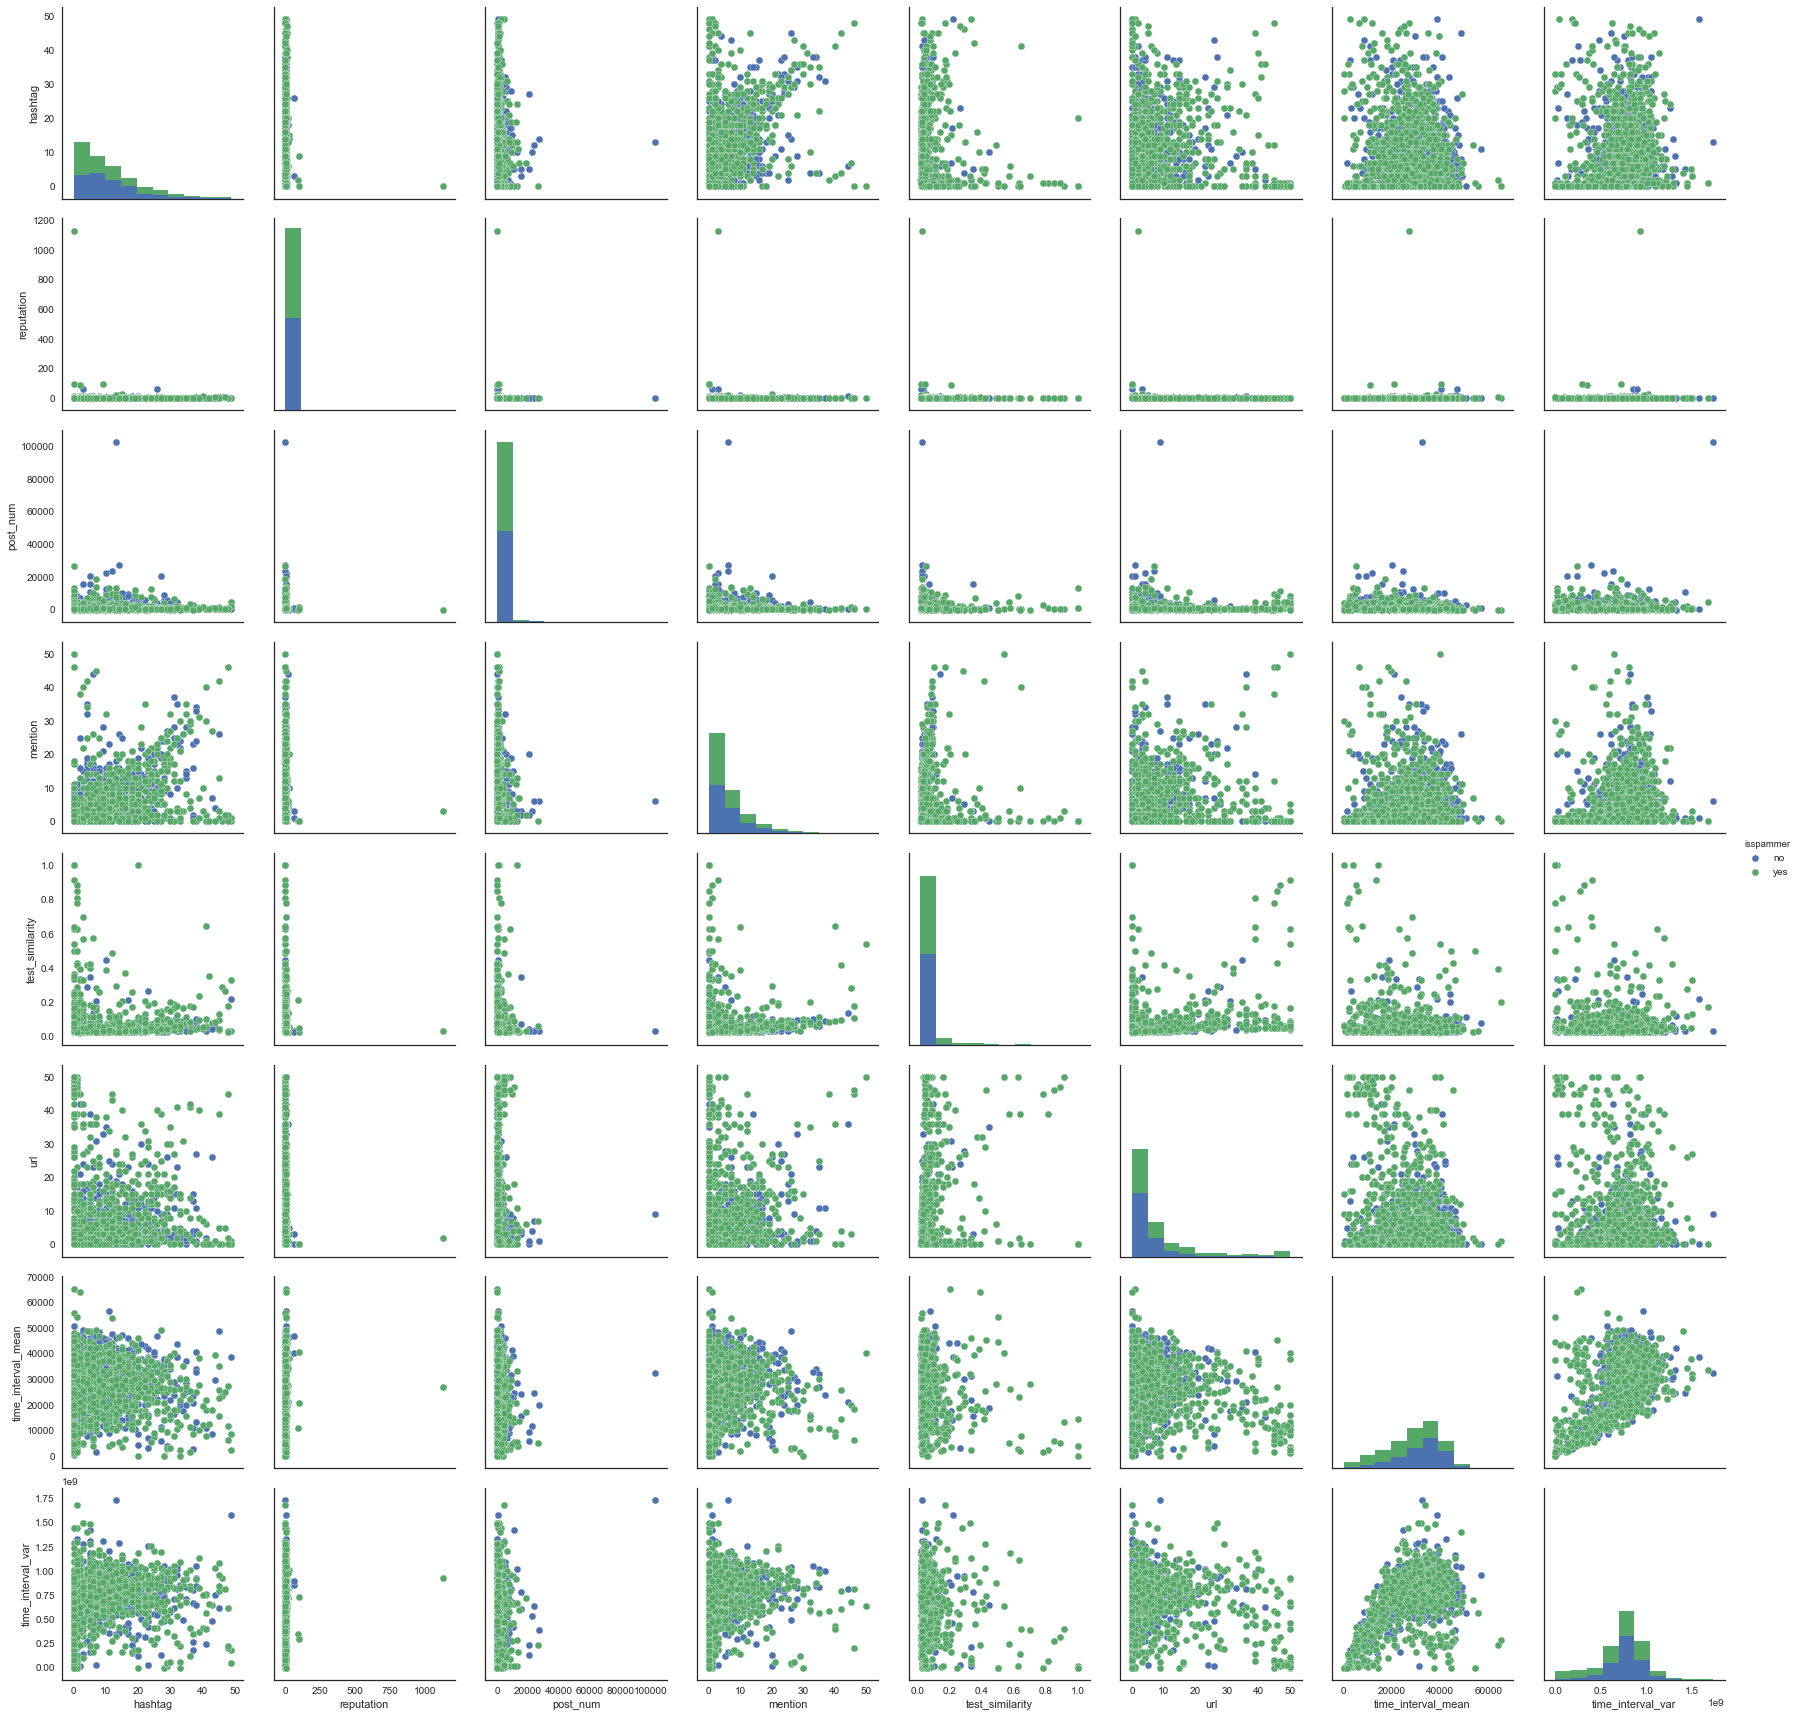

In [31]:
sns.pairplot(data, hue="is_spammer", size=3)

In [13]:
data

,hashtag,reputation,post_num,mention,test_similarity,url,time_interval_mean,time_interval_var,followers_num,following_num,content_length,is_spammer
0,15,0.500000,1005,7,0.034592,1,30972.857143,8.239935e+08,179,358,60.480000,no
1,10,1.733333,1819,3,0.026582,0,33023.000000,7.491242e+08,312,180,48.510204,no
2,18,0.984615,3542,3,0.027306,2,36453.708333,6.229223e+08,704,715,59.979592,no
3,27,0.012920,340,19,0.031989,4,11511.346939,7.102748e+08,5,387,102.660000,no
4,7,0.204396,371,3,0.055030,38,26378.770833,7.995144e+08,93,455,54.918367,yes
5,0,0.136757,467,1,0.030800,0,37345.510204,1.169251e+08,253,1850,50.800000,yes
6,6,0.491667,620,2,0.051178,2,18005.395349,1.072603e+09,59,120,73.931818,no
7,4,0.302083,401,42,0.415591,4,14511.469388,6.036607e+08,116,384,59.680000,yes
8,4,0.498062,631,1,0.029096,3,20287.081633,8.519779e+08,257,516,61.840000,no
9,12,3.493370,1479,4,0.074021,18,33078.620000,1.000798e+09,6323,1810,69.666667,yes


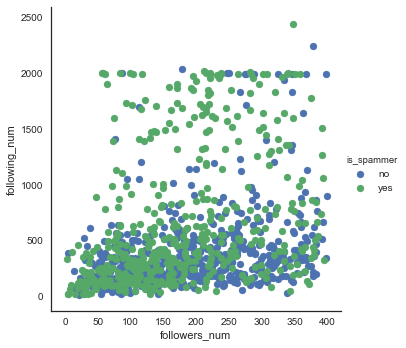

In [19]:
data = data[data['followers_num'] < 400]
sns.FacetGrid(data, hue="is_spammer", size=5) \
   .map(plt.scatter, "followers_num", "following_num") \
   .add_legend()